In [1]:
%run "cnn_classification.ipynb"

Number of images: 11788
Number of training images by default: 5994
Number of testing images by default: 5794
Number of classes: 200

Loading Augmented Images
Augmented Images Loaded

Number of images after augmentation: 29770
Number of training images after augmentation: 23976
Number of testing images: 5794



In [2]:
model = models.mobilenet_v2(weights="DEFAULT")

In [3]:
model

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [6]:
# freeze all layers for fine tuning (not doing this takes it very long to train)
for param in model.parameters():
    param.requires_grad = False


print(model.classifier[1].in_features)
#number of inputs in last layer
num_ftrs = model.classifier[1].in_features

model.classifier[1] = nn.Linear(num_ftrs, num_out_ftrs)


# printing the last layer : classifier
print(model.classifier)

model = model.to(device)

1280
Sequential(
  (0): Dropout(p=0.2, inplace=False)
  (1): Linear(in_features=1280, out_features=200, bias=True)
)


In [7]:
print_model_params(model)

Total number of parameters in model: 2480072
Total number of training parameters in model: 256200


(2480072, 256200)

Training Started on cuda
Epoch 1/5- - - - - - - - - - 
train Loss: 4.37 Acc: 11.73% Time_Taken: 3m 12s
test Loss: 2.91 Acc: 32.76% Time_Taken: 0m 39s

Epoch 2/5- - - - - - - - - - 
train Loss: 3.52 Acc: 23.67% Time_Taken: 3m 10s
test Loss: 2.47 Acc: 39.54% Time_Taken: 0m 38s

Epoch 3/5- - - - - - - - - - 
train Loss: 3.25 Acc: 28.41% Time_Taken: 3m 2s
test Loss: 2.34 Acc: 42.51% Time_Taken: 0m 38s

Epoch 4/5- - - - - - - - - - 
train Loss: 3.13 Acc: 31.06% Time_Taken: 3m 2s
test Loss: 2.29 Acc: 42.96% Time_Taken: 0m 38s

Epoch 5/5- - - - - - - - - - 
train Loss: 3.07 Acc: 32.14% Time_Taken: 3m 1s
test Loss: 2.27 Acc: 44.10% Time_Taken: 0m 37s

Training Finished in 15m 28s
Best Test Accuracy: 44.097342
MobileNetV2_checkpoint_best_acc_44.0973__epoch_5_optim_Adam_criterion_CrossEntropyLoss


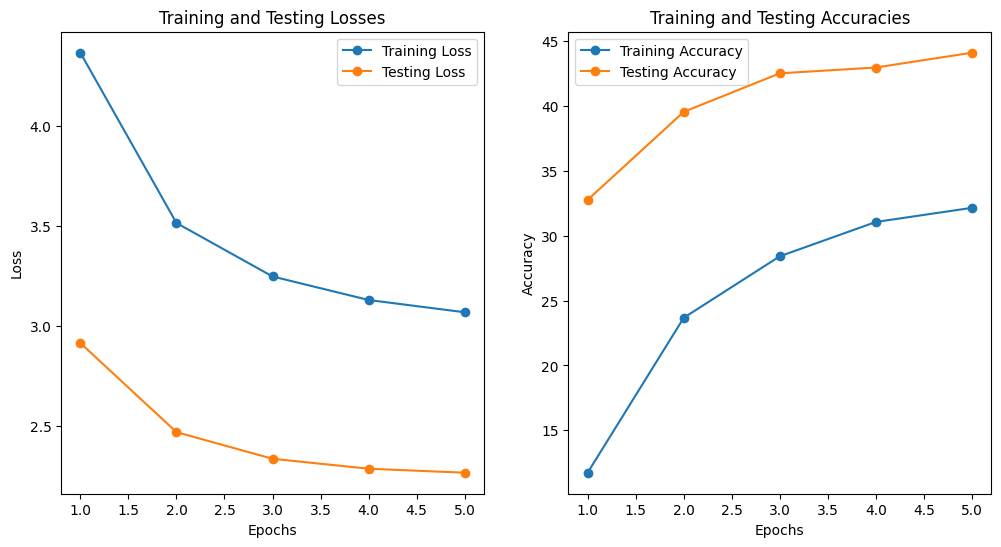

In [8]:
model, checkpoint = train_model(model, num_epoch=5)

In [11]:
for param in model.parameters():
    param.requires_grad = True

Training Started on cuda
Epoch 1/5- - - - - - - - - - 
train Loss: 3.60 Acc: 20.10% Time_Taken: 5m 17s
test Loss: 2.51 Acc: 39.30% Time_Taken: 0m 43s

Epoch 2/5- - - - - - - - - - 
train Loss: 2.83 Acc: 33.13% Time_Taken: 5m 10s
test Loss: 2.07 Acc: 49.93% Time_Taken: 0m 38s

Epoch 3/5- - - - - - - - - - 
train Loss: 2.44 Acc: 40.84% Time_Taken: 5m 10s
test Loss: 1.86 Acc: 53.76% Time_Taken: 0m 38s

Epoch 4/5- - - - - - - - - - 
train Loss: 2.13 Acc: 47.78% Time_Taken: 5m 6s
test Loss: 1.85 Acc: 56.42% Time_Taken: 0m 38s

Epoch 5/5- - - - - - - - - - 
train Loss: 1.96 Acc: 51.74% Time_Taken: 5m 7s
test Loss: 1.94 Acc: 56.51% Time_Taken: 0m 38s

Training Finished in 25m 50s
Best Test Accuracy: 56.506731
MobileNetV2_checkpoint_best_acc_56.5067__epoch_5_optim_Adam_criterion_CrossEntropyLoss


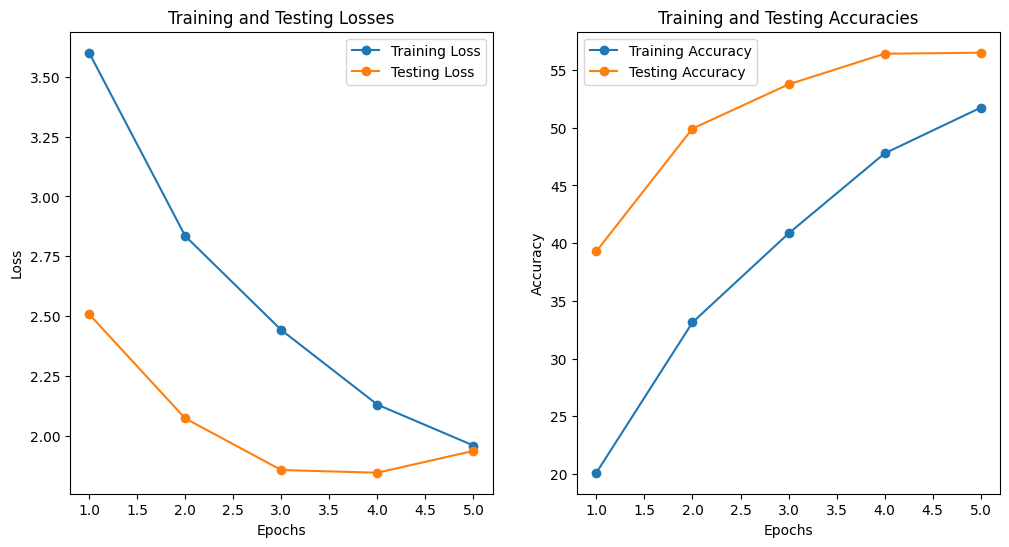

In [12]:
model, checkpoint2 = train_model(model, num_epoch=5, save_checkpoint=True)

In [50]:
final_time = 15 + 28/60 + 25 + 50/60
print(f"Final Time: {final_time:.2f} mins")
print(f"Final Best Accuracy after 10 epochs: {56.506731}")

Final Time: 41.30 mins
Final Best Accuracy after 10 epochs: 56.506731
